# Feature Engineering > Feature Transformation

## Outliers Handling

### z-score (For normally or sort of normally distributed data)

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading Data 

In [2]:
#load dataset
df1=pd.read_csv('placement.csv')
#read first 5 rows
df1.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
#shape
df1.shape

(1000, 3)

In [4]:
#basic information(data-type, missing values)
df1.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
#duplicated values
df1.duplicated().sum()
#for now we are just keeping duplicates

19

In [6]:
#statistical analysis
df1.describe().T
#observation-->looks like 'cgpa' is sort of normally distributed
#observation-->'placement_exam_marks' are right skewed and have outliers

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


In [7]:
#correaltion between features
df1.corr()
#observation-->placement has positive correlation with cgpa, and negative correlation with placement_exam_marks

,cgpa,placement_exam_marks,placed
cgpa,1.000000,-0.027371,0.027212
placement_exam_marks,-0.027371,1.000000,-0.025530
placed,0.027212,-0.025530,1.000000


### Graphical Analysis

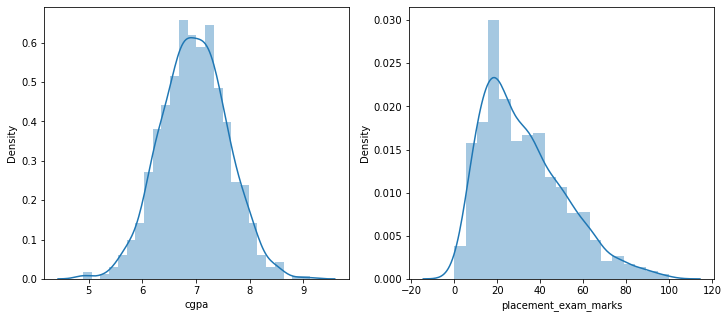

In [8]:
#distplot of 'cgpa' and 'placement_exam_marks'
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(df1['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df1['placement_exam_marks'])
plt.show()
#observation-->'cgpa' is sort of normally distributed
#observation-->'placement_exam_marks' is right skewed and has right outliers

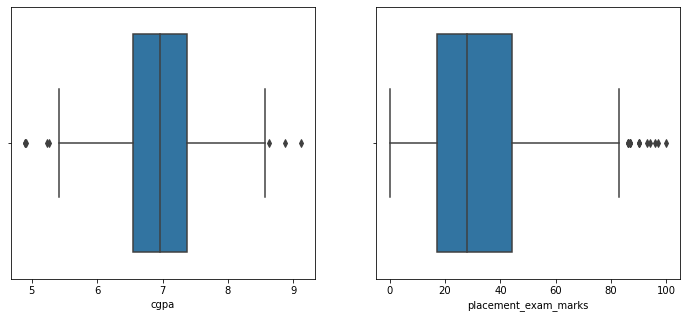

In [9]:
#boxplot of 'cgpa' and 'placement_exam_marks'
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df1['cgpa'])
plt.subplot(1,2,2)
sns.boxplot(df1['placement_exam_marks'])
plt.show()
#observation-->'cgpa' is sort of normally distributed
#observation-->'placement_exam_marks' is right skewed and has right outliers

**so here we will focus on 'cgpa' being sort of normally distributed data**

In [10]:
print(df1['cgpa'].skew())
#observation-->'cgpa' is very little negatively skewed(approx 1.5%)
print(df1['placement_exam_marks'].skew())
#observation-->'placement_exam_marks' is highly postively skewed(approx 84%)

-0.014529938929314918
0.8356419499466834


### z-score (for normal or sort of normally distributed data)

In [11]:
#'cgpa' data description
df1['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [12]:
#mean, std, min, max
mean_=df1['cgpa'].mean()
std_=df1['cgpa'].std()
min_=df1['cgpa'].min()
max_=df1['cgpa'].max()
print(f'mean={mean_}, std={std_}, min={min_}, max={max_}')

mean=6.96124000000001, std=0.6158978751323894, min=4.89, max=9.12


In [13]:
print('lower limit', mean_-3*std_)
print('upper limit', mean_+3*std_)

lower limit 5.113546374602842
upper limit 8.808933625397177


In [14]:
#'cgpa'(normally distributed)-->(mean-3*std.dev., mean+3*std.dev.)-->z-score=3
df1[(df1['cgpa']<(mean_-3*std_)) | (df1['cgpa']>(mean_+3*std_))]
#observation-->filter data having outliers(5-rows)

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#### Trimming (remove outliers)

##### Trimming using lower and  upper fence [mean-3*std, mean+3*std]


In [15]:
#Trimming using lower and  upper fence [mean-3*std, mean+3*std]
df2=df1.drop(df1[(df1['cgpa']<(mean_-3*std_)) | (df1['cgpa']>(mean_+3*std_))].index)
df2
#observation-->995=(1000-5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


##### Trimming using z-score= (x-mean)/std

In [16]:
#Trimming using z-score=(x-mean)/std
df1['cgpa_z_score']=(df1['cgpa']-df1['cgpa'].mean())/df1['cgpa'].std()

In [17]:
#first 5 rows of new df1
df1.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [18]:
#z-score range(-3, +3)
df1[(df1.cgpa_z_score<-3) | (df1.cgpa_z_score>3)]
#filterd data haviing outliers(5-rows)

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [19]:
#Trimming using lower and  upper fence [mean-3*std, mean+3*std]
df2=df1.drop(df1[(df1.cgpa_z_score<-3) | (df1.cgpa_z_score>3)].index)
df2
#observation-->995=(1000-5)rows

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [20]:
#before trimming description of 'cgpa'
df1['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [21]:
#after trimming description of 'cgpa'
df2['cgpa'].describe()

count    995.000000
mean       6.963357
std        0.600082
min        5.230000
25%        6.550000
50%        6.960000
75%        7.365000
max        8.620000
Name: cgpa, dtype: float64

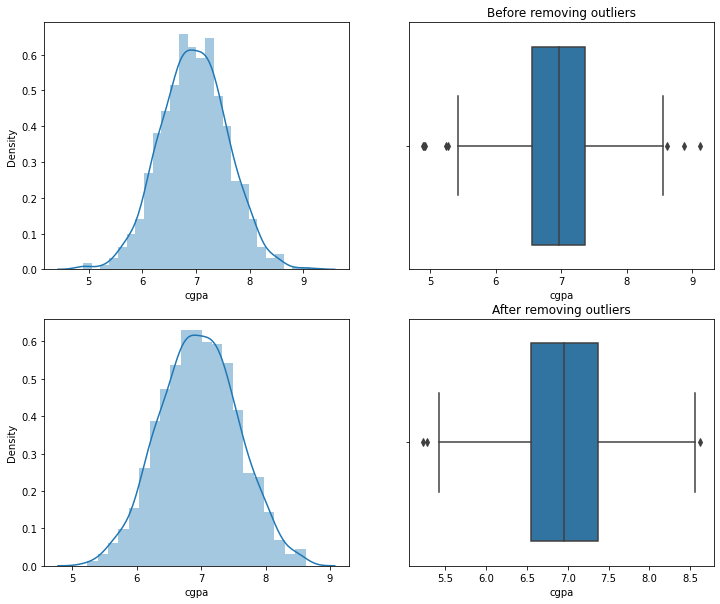

In [22]:
#distplot and boxplot of 'cgpa' before and after triming outliers
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.distplot(df1['cgpa'])
plt.subplot(2,2,2)
sns.boxplot(df1['cgpa'])
plt.title("Before removing outliers", loc='center')

plt.subplot(2,2,3)
sns.distplot(df2['cgpa'])
plt.subplot(2,2,4)
sns.boxplot(df2['cgpa'])
plt.title("After removing outliers", loc='center')

plt.show()
#observation-->'cgpa' some outliers removed

#### Capping (set lower and upper bound values to outliers)

In [23]:
#Capping
lower_limit=df1['cgpa'].mean()-3*df1['cgpa'].std()
upper_limit=df1['cgpa'].mean()+3*df1['cgpa'].std()
print(lower_limit, upper_limit)

5.113546374602842 8.808933625397177


In [24]:
#setting lower and upper limit values on outliers using np.where
df1['cgpa_new']=np.where(df1['cgpa']>upper_limit,upper_limit, np.where(df1['cgpa']<lower_limit, lower_limit, df1['cgpa']))
#into array

In [25]:
#'cgpa' and 'cgpa_new' data description
df1.describe()

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_new
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,6.961240,32.225000,0.489000,-1.600275e-14,6.961499
std,0.615898,19.130822,0.500129,1.000000e+00,0.612688
min,4.890000,0.000000,0.000000,-3.362960e+00,5.113546
25%,6.550000,17.000000,0.000000,-6.677081e-01,6.550000
50%,6.960000,28.000000,0.000000,-2.013321e-03,6.960000
75%,7.370000,44.000000,1.000000,6.636815e-01,7.370000
max,9.120000,100.000000,1.000000,3.505062e+00,8.808934


In [26]:
#shape(no rows are removd here, instead outliers are set to new values)
df1.shape

(1000, 5)

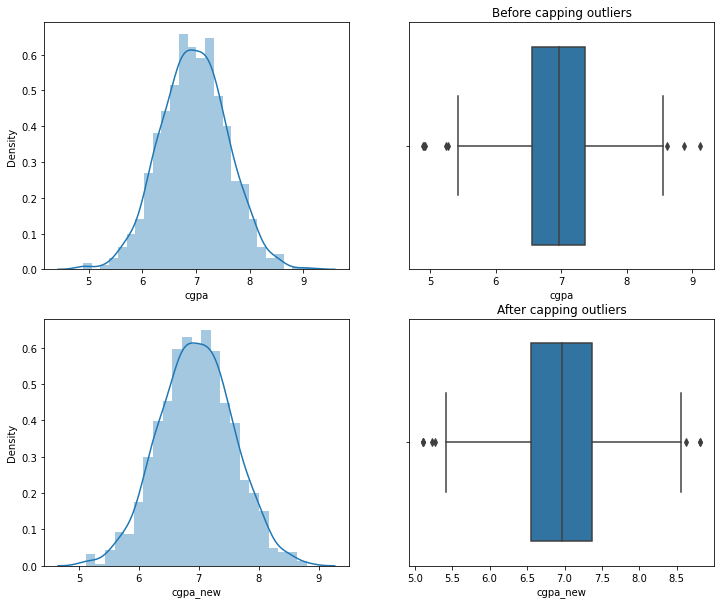

In [27]:
#distplot and boxplot of 'cgpa' before and after capping outliers
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.distplot(df1['cgpa'])
plt.subplot(2,2,2)
sns.boxplot(df1['cgpa'])
plt.title("Before capping outliers", loc='center')

plt.subplot(2,2,3)
sns.distplot(df1['cgpa_new'])
plt.subplot(2,2,4)
sns.boxplot(df1['cgpa_new'])
plt.title("After capping outliers", loc='center')

plt.show()
#observation-->'cgpa' some outliers removed

**END of Document.**